In [1]:
import pandas as pd
import koreanize_matplotlib

In [2]:
learn=pd.read_csv('./학년_및_시도별_학생_1인당_월평균_사교육비_초등학교__20230810105136.csv', encoding='cp949')

In [3]:
learn

,시도별,2019,2020,2021,2022
0,시도별,전체,전체,전체,전체
1,전체,29.0,23.5,32.8,37.2
2,서울,38.5,35.1,47.3,53.6
3,부산,28.8,21.1,32.8,35.1
4,대구,29.5,21.3,37.4,40.4
5,인천,27.8,24.3,29.8,35.1
6,광주,24.3,26.3,27.4,31.0
7,대전,27.9,22.7,34.1,37.0
8,울산,24.8,19.7,26.7,35.4
9,세종,30.6,24.5,33.1,37.7


In [4]:
learn=learn.drop(0, axis=0)

In [5]:
learn=learn.drop(1, axis=0)

In [6]:
learn

,시도별,2019,2020,2021,2022
2,서울,38.5,35.1,47.3,53.6
3,부산,28.8,21.1,32.8,35.1
4,대구,29.5,21.3,37.4,40.4
5,인천,27.8,24.3,29.8,35.1
6,광주,24.3,26.3,27.4,31.0
7,대전,27.9,22.7,34.1,37.0
8,울산,24.8,19.7,26.7,35.4
9,세종,30.6,24.5,33.1,37.7
10,경기,33.2,23.5,34.6,40.1
11,강원,22.5,20.9,24.6,28.8


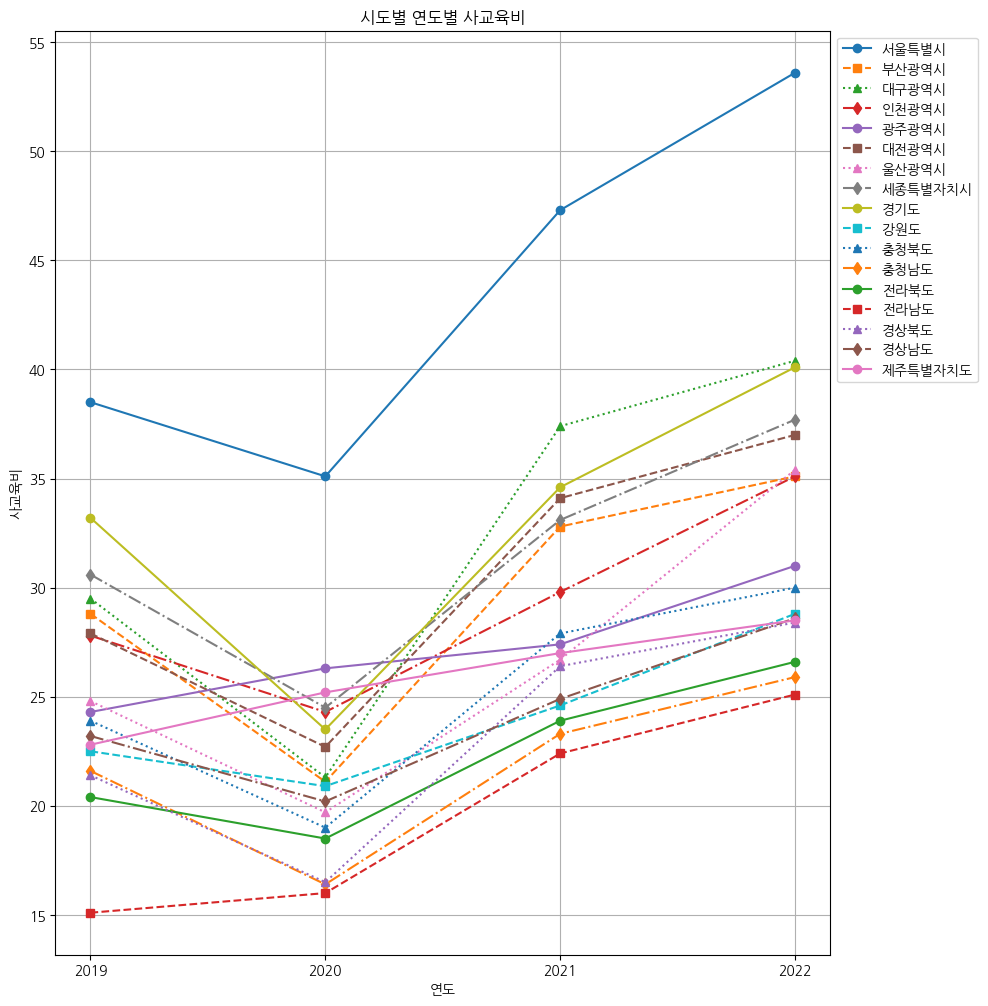

In [14]:
import matplotlib.pyplot as plt
import numpy as np

data = {
    '시도별': ['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도'],
    2019: [38.5, 28.8, 29.5, 27.8, 24.3, 27.9, 24.8, 30.6, 33.2, 22.5, 23.9, 21.6, 20.4, 15.1, 21.4, 23.2, 22.8],
    2020: [35.1, 21.1, 21.3, 24.3, 26.3, 22.7, 19.7, 24.5, 23.5, 20.9, 19.0, 16.4, 18.5, 16.0, 16.5, 20.2, 25.2],
    2021: [47.3, 32.8, 37.4, 29.8, 27.4, 34.1, 26.7, 33.1, 34.6, 24.6, 27.9, 23.3, 23.9, 22.4, 26.4, 24.9, 27.0],
    2022: [53.6, 35.1, 40.4, 35.1, 31.0, 37.0, 35.4, 37.7, 40.1, 28.8, 30.0, 25.9, 26.6, 25.1, 28.4, 28.6, 28.5]
}

years = list(data.keys())[1:]
locations = data['시도별']

plt.figure(figsize=(10, 12))

styles = ['-', '--', ':', '-.']
markers = ['o', 's', '^', 'd']

for i, location in enumerate(locations):
    values = [data[year][locations.index(location)] for year in years]
    plt.plot(years, values, linestyle=styles[i % len(styles)], marker=markers[i % len(markers)], label=location)

plt.title('시도별 연도별 사교육비')
plt.xlabel('연도')
plt.ylabel('사교육비')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.xticks(years, map(int, years))
plt.show()

In [15]:
import numpy as np
from sklearn.linear_model import LinearRegression

data = {
    '시도별': ['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도'],
    2019: [38.5, 28.8, 29.5, 27.8, 24.3, 27.9, 24.8, 30.6, 33.2, 22.5, 23.9, 21.6, 20.4, 15.1, 21.4, 23.2, 22.8],
    2020: [35.1, 21.1, 21.3, 24.3, 26.3, 22.7, 19.7, 24.5, 23.5, 20.9, 19.0, 16.4, 18.5, 16.0, 16.5, 20.2, 25.2],
    2021: [47.3, 32.8, 37.4, 29.8, 27.4, 34.1, 26.7, 33.1, 34.6, 24.6, 27.9, 23.3, 23.9, 22.4, 26.4, 24.9, 27.0],
    2022: [53.6, 35.1, 40.4, 35.1, 31.0, 37.0, 35.4, 37.7, 40.1, 28.8, 30.0, 25.9, 26.6, 25.1, 28.4, 28.6, 28.5]
}

years = np.array(list(data.keys())[1:])
locations = data['시도별']

# 향후 5년간의 연도 생성
future_years = np.arange(2024, 2029)

styles = ['-', '--', ':', '-.']
markers = ['o', 's', '^', 'd']

for i, location in enumerate(locations):
    values = [data[year][locations.index(location)] for year in years]
    
    # 선형 회귀 모델 초기화
    model = LinearRegression()
    
    # 모델에 데이터 학습
    model.fit(years.reshape(-1, 1), values)
    
    # 향후 5년간의 추세 예측
    predicted_values = model.predict(future_years.reshape(-1, 1))
    
    print(f"{location} 예측 사교육비:")
    for year, value in zip(future_years, predicted_values):
        print(f"{year}: {value:.2f}")
    
    print()

서울특별시 예측 사교육비:
2024: 63.75
2025: 69.50
2026: 75.25
2027: 81.00
2028: 86.75

부산광역시 예측 사교육비:
2024: 40.16
2025: 43.22
2026: 46.28
2027: 49.34
2028: 52.40

대구광역시 예측 사교육비:
2024: 49.23
2025: 54.11
2026: 58.99
2027: 63.87
2028: 68.75

인천광역시 예측 사교육비:
2024: 38.84
2025: 41.58
2026: 44.32
2027: 47.06
2028: 49.80

광주광역시 예측 사교육비:
2024: 34.67
2025: 36.79
2026: 38.91
2027: 41.03
2028: 43.15

대전광역시 예측 사교육비:
2024: 43.97
2025: 47.84
2026: 51.71
2027: 55.58
2028: 59.45

울산광역시 예측 사교육비:
2024: 40.23
2025: 44.11
2026: 47.99
2027: 51.87
2028: 55.75

세종특별자치시 예측 사교육비:
2024: 41.94
2025: 44.93
2026: 47.92
2027: 50.91
2028: 53.90

경기도 예측 사교육비:
2024: 43.98
2025: 47.16
2026: 50.34
2027: 53.52
2028: 56.70

강원도 예측 사교육비:
2024: 32.11
2025: 34.37
2026: 36.63
2027: 38.89
2028: 41.15

충청북도 예측 사교육비:
2024: 34.72
2025: 37.44
2026: 40.16
2027: 42.88
2028: 45.60

충청남도 예측 사교육비:
2024: 28.73
2025: 30.71
2026: 32.69
2027: 34.67
2028: 36.65

전라북도 예측 사교육비:
2024: 30.75
2025: 33.15
2026: 35.55
2027: 37.95
2028: 40.35

전라남도 예측 사교육비:
202

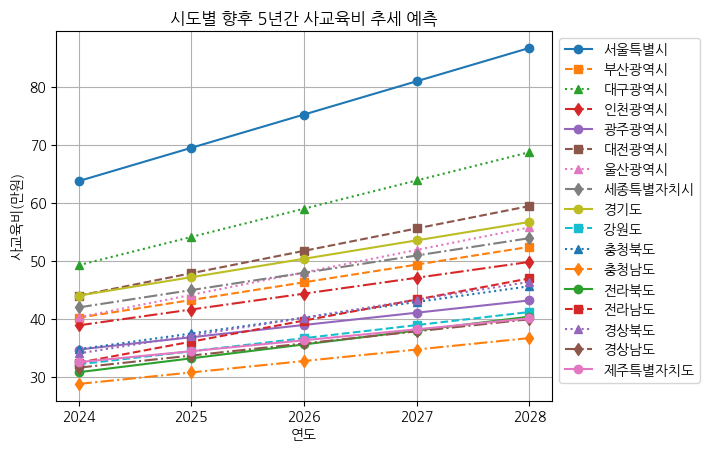

In [16]:
for i, location in enumerate(locations):
    values = [data[year][locations.index(location)] for year in years]
    
    # 선형 회귀 모델 초기화
    model = LinearRegression()
    
    # 모델에 데이터 학습
    model.fit(years.reshape(-1, 1), values)
    
    # 향후 5년간의 추세 예측
    predicted_values = model.predict(future_years.reshape(-1, 1))
    
    plt.plot(future_years, predicted_values, linestyle=styles[i % len(styles)], marker=markers[i % len(markers)], label=location)

plt.title('시도별 향후 5년간 사교육비 추세 예측')
plt.xlabel('연도')
plt.ylabel('사교육비(만원)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.xticks(future_years)  # 예측 연도 표시

plt.show()